In [6]:
import pandas, seaborn, scipy, numpy, matplotlib, sklearn, collections, itertools, math

%matplotlib inline
from matplotlib import pyplot
matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)


# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500

def bootstrap(values, statistic=numpy.mean, samples=5000):
    values = pandas.Series(values).dropna()
    if len(values) <= 1:
        return (numpy.nan, numpy.nan)
    values = [statistic(sklearn.utils.resample(values)) for i in range(samples)]
    return (numpy.percentile(values, 5), numpy.percentile(values, 95))

def round_to_n(x, n):
    return round(x, -int(math.floor(math.log10(x))) + (n - 1)) 

def mean_with_errorbars(values, decimals=0, plusminus=False, function=numpy.mean):
    pattern = "%%0.%df" % decimals
    bars = bootstrap(values, statistic=function)
    if numpy.nan in bars:
        return pattern % function(values)
    diff = (bars[1] - bars[0]) / 2
    if decimals == 0:
        bars = (round_to_n(bars[0], 2), round_to_n(bars[1], 2))
        diff = round_to_n(diff, 1)
    if plusminus:
        return (pattern + " $\\pm$ " + pattern) % (function(values), diff)
    return (pattern + " (" + pattern + "-" + pattern + ")") % ((function(values),) + bars)

def median_with_errorbars(values, decimals=0, plusminus=False, function=numpy.median):
    return mean_with_errorbars(values, decimals, plusminus, function)

def percent_change_with_errorbars(values1, values2, statistic=numpy.mean, samples=5000):
    values1 = pandas.Series(values1).dropna()
    values2 = pandas.Series(values2).dropna()

    if len(values1) <= 1 or len(values2) <= 1:
        return (numpy.nan, numpy.nan)
    
    samples1 = pandas.Series(
        [statistic(sklearn.utils.resample(values1)) for i in range(samples)])
    samples2 = pandas.Series(
        [statistic(sklearn.utils.resample(values2)) for i in range(samples)])
    
    changes = ((samples2 - samples1) * 100.0 / samples1).dropna()
    return "%0.2f%% (%0.1f - %0.1f)" % (
        changes.mean(),
        numpy.percentile(changes, 5),
        numpy.percentile(changes, 95))


pandas.set_option('display.max_columns', 500)


def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')

In [3]:
cohort_df = pandas.read_csv("../additional-files/Additional File 1.csv")
cohort_df

,source_id,RNA_id,RNA biospecimen,DNA_id,DNA_biospecimen,specimen_type_description,CollectionPoint,SpecimenType,RNA data file,DNA_sample_string,icgc_sample_id,project_code,submitted_sample_id,icgc_specimen_id,submitted_specimen_id,icgc_donor_id,submitted_donor_id,analyzed_sample_interval,percentage_cellularity,level_of_cellularity,study,study_specimen_involved_in,specimen_type,specimen_type_other,specimen_interval,...,other snv mutations,other snv neoantigens,other snv expressed neoantigens,snv mutations,snv neoantigens,snv expressed neoantigens,mnv mutations,mnv neoantigens,mnv expressed neoantigens,indel mutations,indel neoantigens,indel expressed neoantigens,carboplatin,paclitaxel,liposomal doxorubicin,gemcitabine,cyclophosphamide,topotecan,cisplatin,olaparib,docetaxel,bevacizumab,etoposide,nab-paclitaxel,farletuzumab/placebo
0,AOCS-001-1-7,ICGCDBDE20130916001,AOCS-001-2-0,AOCS_001_ICGC_DBPC_20130205_002,AOCS-001-1-7,primary tumour,Primary,Tumour,130906_D81P8DQ1_0153_C2704ACXX.nopd.AOCS_001_I...,ICGCDBPC20130205002,SA505244,OV-AU,AOCS-001-1-7,SP101515,AOCS-001-1,DO46325,AOCS-001,1895.0,73.0,61-80%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,0.335747,0.270605,0.293826,5686.0,104.0,71.0,0.010268,0.016393,0.000000,0.014925,0.131148,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False
1,AOCS-004-1-5,ICGCDBDE20130916003,AOCS-004-2-9,AOCS_004_ICGC_DBPC_20130205_004,AOCS-004-1-5,primary tumour,Primary,Tumour,130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_004_I...,ICGCDBPC20130205004,SA505270,OV-AU,AOCS-004-1-5,SP101519,AOCS-004-1,DO46327,AOCS-004,1350.0,77.0,61-80%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,0.435291,0.362958,0.519262,6587.0,48.0,20.0,0.008726,0.000000,0.000000,0.029851,0.172414,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False
2,AOCS-005-1-8,ICGCDBDE20130916004,AOCS-005-2-1,AOCS_005_ICGC_DBPC_20130205_006,AOCS-005-1-8,primary tumour,Primary,Tumour,130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_005_I...,ICGCDBPC20130205006,SA505282,OV-AU,AOCS-005-1-8,SP101521,AOCS-005-1,DO46328,AOCS-005,2128.0,90.0,>81%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,0.525860,0.456709,0.373072,5582.0,60.0,36.0,0.005167,0.000000,0.000000,0.033898,0.000000,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False
3,AOCS-034-1-0,ICGCDBLG2010050402TR,AOCS-034-2-4,AOCS_034_ICGC_DBPC_20130205_009,AOCS-034-1-0,primary tumour,Primary,Tumour,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_034_IC...,ICGCDBPC20130205009,SA505297,OV-AU,AOCS-034-1-0,SP101523,AOCS-034-1,DO46329,AOCS-034,1953.0,84.0,>81%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,0.249783,0.223347,0.270322,6858.0,154.0,58.0,0.007520,0.005988,0.016949,0.051020,0.071856,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False
4,AOCS-034-3-8,ICGCDBDE20131122024,AOCS-034-4-1,AOCS_034_ICGC_DBPC_20130205_007,AOCS-034-3-8,recurrent ascitic fluid,Recurrence,Ascites,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_034_IC...,ICGCDBPC20130205007,SA505303,OV-AU,AOCS-034-3-8,SP101524,AOCS-034-13,DO46329,AOCS-034,110.0,99.0,>81%,NaN,NaN,Recurrent tumour - other,recurrent ascitic fluid,1597,...,0.371331,0.434420,0.497789,13091.0,259.0,123.0,0.010501,0.003731,0.008065,0.045752,0.029851,0.000000,True,True,True,True,False,True,False,False,False,False,False,False,False
5,AOCS-055-1-7,ICGCDBDE20130916005,AOCS-055-2-0,AOCS_055_ICGC_DBPC_20130205_011,AOCS-055-1-7,primary tumour,Primary,Tumour,130906_D81P8DQ1_0153_C2704ACXX.nopd.AOCS_055_I...,ICGCDBPC20130205011,SA505316,OV-AU,AOCS-055-1-7,SP101526,AOCS-055-1,DO46330,AOCS-055,2150.0,82.0,>81%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,0.593488,0.512771,0.607863,14583.0,152.0,91.0,0.004165,0.000000,0.000000,0.013423,0.116279,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False
6,AOCS-056-1-X,ICGCDBLG2010062229TR,AOCS-056-2-3,AOCS_056_ICGC_DBPC_20130205_013,AOCS-056-1-X,primary tumou

In [9]:
cohort_grouped_df = cohort_df.groupby(["specific_treatment", "tissue_type", "donor"])[
    ["peptides", "expressed peptides", "mutations_per_mb", "percent_peptides_expressed"]
].mean().reset_index()
cohort_grouped_df

,specific_treatment,tissue_type,donor,peptides,expressed peptides,mutations_per_mb,percent_peptides_expressed
0,primary/treated,solid,AOCS-077,85.000000,16.000000,1.002665,18.823529
1,primary/treated,solid,AOCS-106,306.000000,44.000000,4.410726,14.379085
2,primary/treated,solid,AOCS-158,242.000000,89.000000,2.306129,36.776860
3,primary/treated,solid,AOCS-162,62.000000,9.000000,1.716522,14.516129
4,primary/treated,solid,AOCS-169,36.000000,10.000000,1.481346,27.777778
5,primary/untreated,ascites,AOCS-093,268.000000,113.000000,3.171552,42.164179
6,primary/untreated,ascites,AOCS-137,230.000000,76.000000,4.092605,33.043478
7,primary/untreated,ascites,AOCS-170,94.000000,25.000000,3.193871,26.595745
8,primary/untreated,ascites,AOCS-171,172.000000,75.000000,3.213524,43.604651
9,primary/untreated,solid,AOCS-001,122.000000,71.000000,1.914057,58.196721


********** mutations_per_mb solid All samples
Medians:  2.2238507661558957 4.963357761492339 1.7165223184543636
Median error bars 2.22 (2.12-2.32) 4.96 (3.03-6.08) 1.72 (1.00-4.41)
Percent change adjuvant 80.23% (39.8 - 122.2)
Percent change neoadjuvant -15.88% (-47.0 - 22.6)
P-value adj change:  MannwhitneyuResult(statistic=48.0, pvalue=0.00072901015123750222)
P-value neoadj change:  MannwhitneyuResult(statistic=134.0, pvalue=0.1460690844642758)

********** mutations_per_mb solid Grouped samples
Medians:  2.2238507661558957 4.462025316455696 1.7165223184543636
Median error bars 2.22 (2.12-2.32) 4.46 (2.96-5.96) 1.72 (1.00-4.41)
Percent change adjuvant 71.15% (24.0 - 122.2)
Percent change neoadjuvant -16.24% (-46.7 - 21.8)
P-value adj change:  MannwhitneyuResult(statistic=26.0, pvalue=0.012723970819605353)
P-value neoadj change:  MannwhitneyuResult(statistic=134.0, pvalue=0.1460690844642758)

********** mutations_per_mb ascites All samples
Medians:  3.203697534976682 4.377415056628913 

/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Median error bars 3.20 (3.17-3.65) 4.38 (3.80-4.79) nan
Percent change adjuvant 31.03% (13.7 - 48.6)
Percent change neoadjuvant (nan, nan)
P-value adj change:  MannwhitneyuResult(statistic=26.0, pvalue=0.079042113070709741)
P-value neoadj change:  MannwhitneyuResult(statistic=0.0, pvalue=0.0)

********** mutations_per_mb ascites Grouped samples
Medians:  3.203697534976682 4.398900732844769 nan


/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/scipy/stats/stats.py:4879: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


Median error bars 3.20 (3.17-3.65) 4.40 (3.82-4.95) nan
Percent change adjuvant 32.01% (13.6 - 50.8)
Percent change neoadjuvant (nan, nan)
P-value adj change:  MannwhitneyuResult(statistic=22.0, pvalue=0.074167705294647349)
P-value neoadj change:  MannwhitneyuResult(statistic=0.0, pvalue=0.0)

********** peptides solid All samples
Medians:  130.0 353.0 85.0
Median error bars 130.00 (108.00-150.00) 353.00 (184.00-458.00) 85.00 (36.00-306.00)
Percent change adjuvant 123.21% (57.8 - 189.0)
Percent change neoadjuvant -0.50% (-57.4 - 59.6)
P-value adj change:  MannwhitneyuResult(statistic=60.5, pvalue=0.001548407762497362)
P-value neoadj change:  MannwhitneyuResult(statistic=172.5, pvalue=0.38657965569318309)

********** peptides solid Grouped samples
Medians:  130.0 303.0 85.0
Median error bars 130.00 (108.00-150.00) 303.00 (165.50-446.67) 85.00 (36.00-306.00)
Percent change adjuvant 107.60% (31.8 - 190.7)
Percent change neoadjuvant -0.77% (-55.6 - 57.7)
P-value adj change:  MannwhitneyuRe

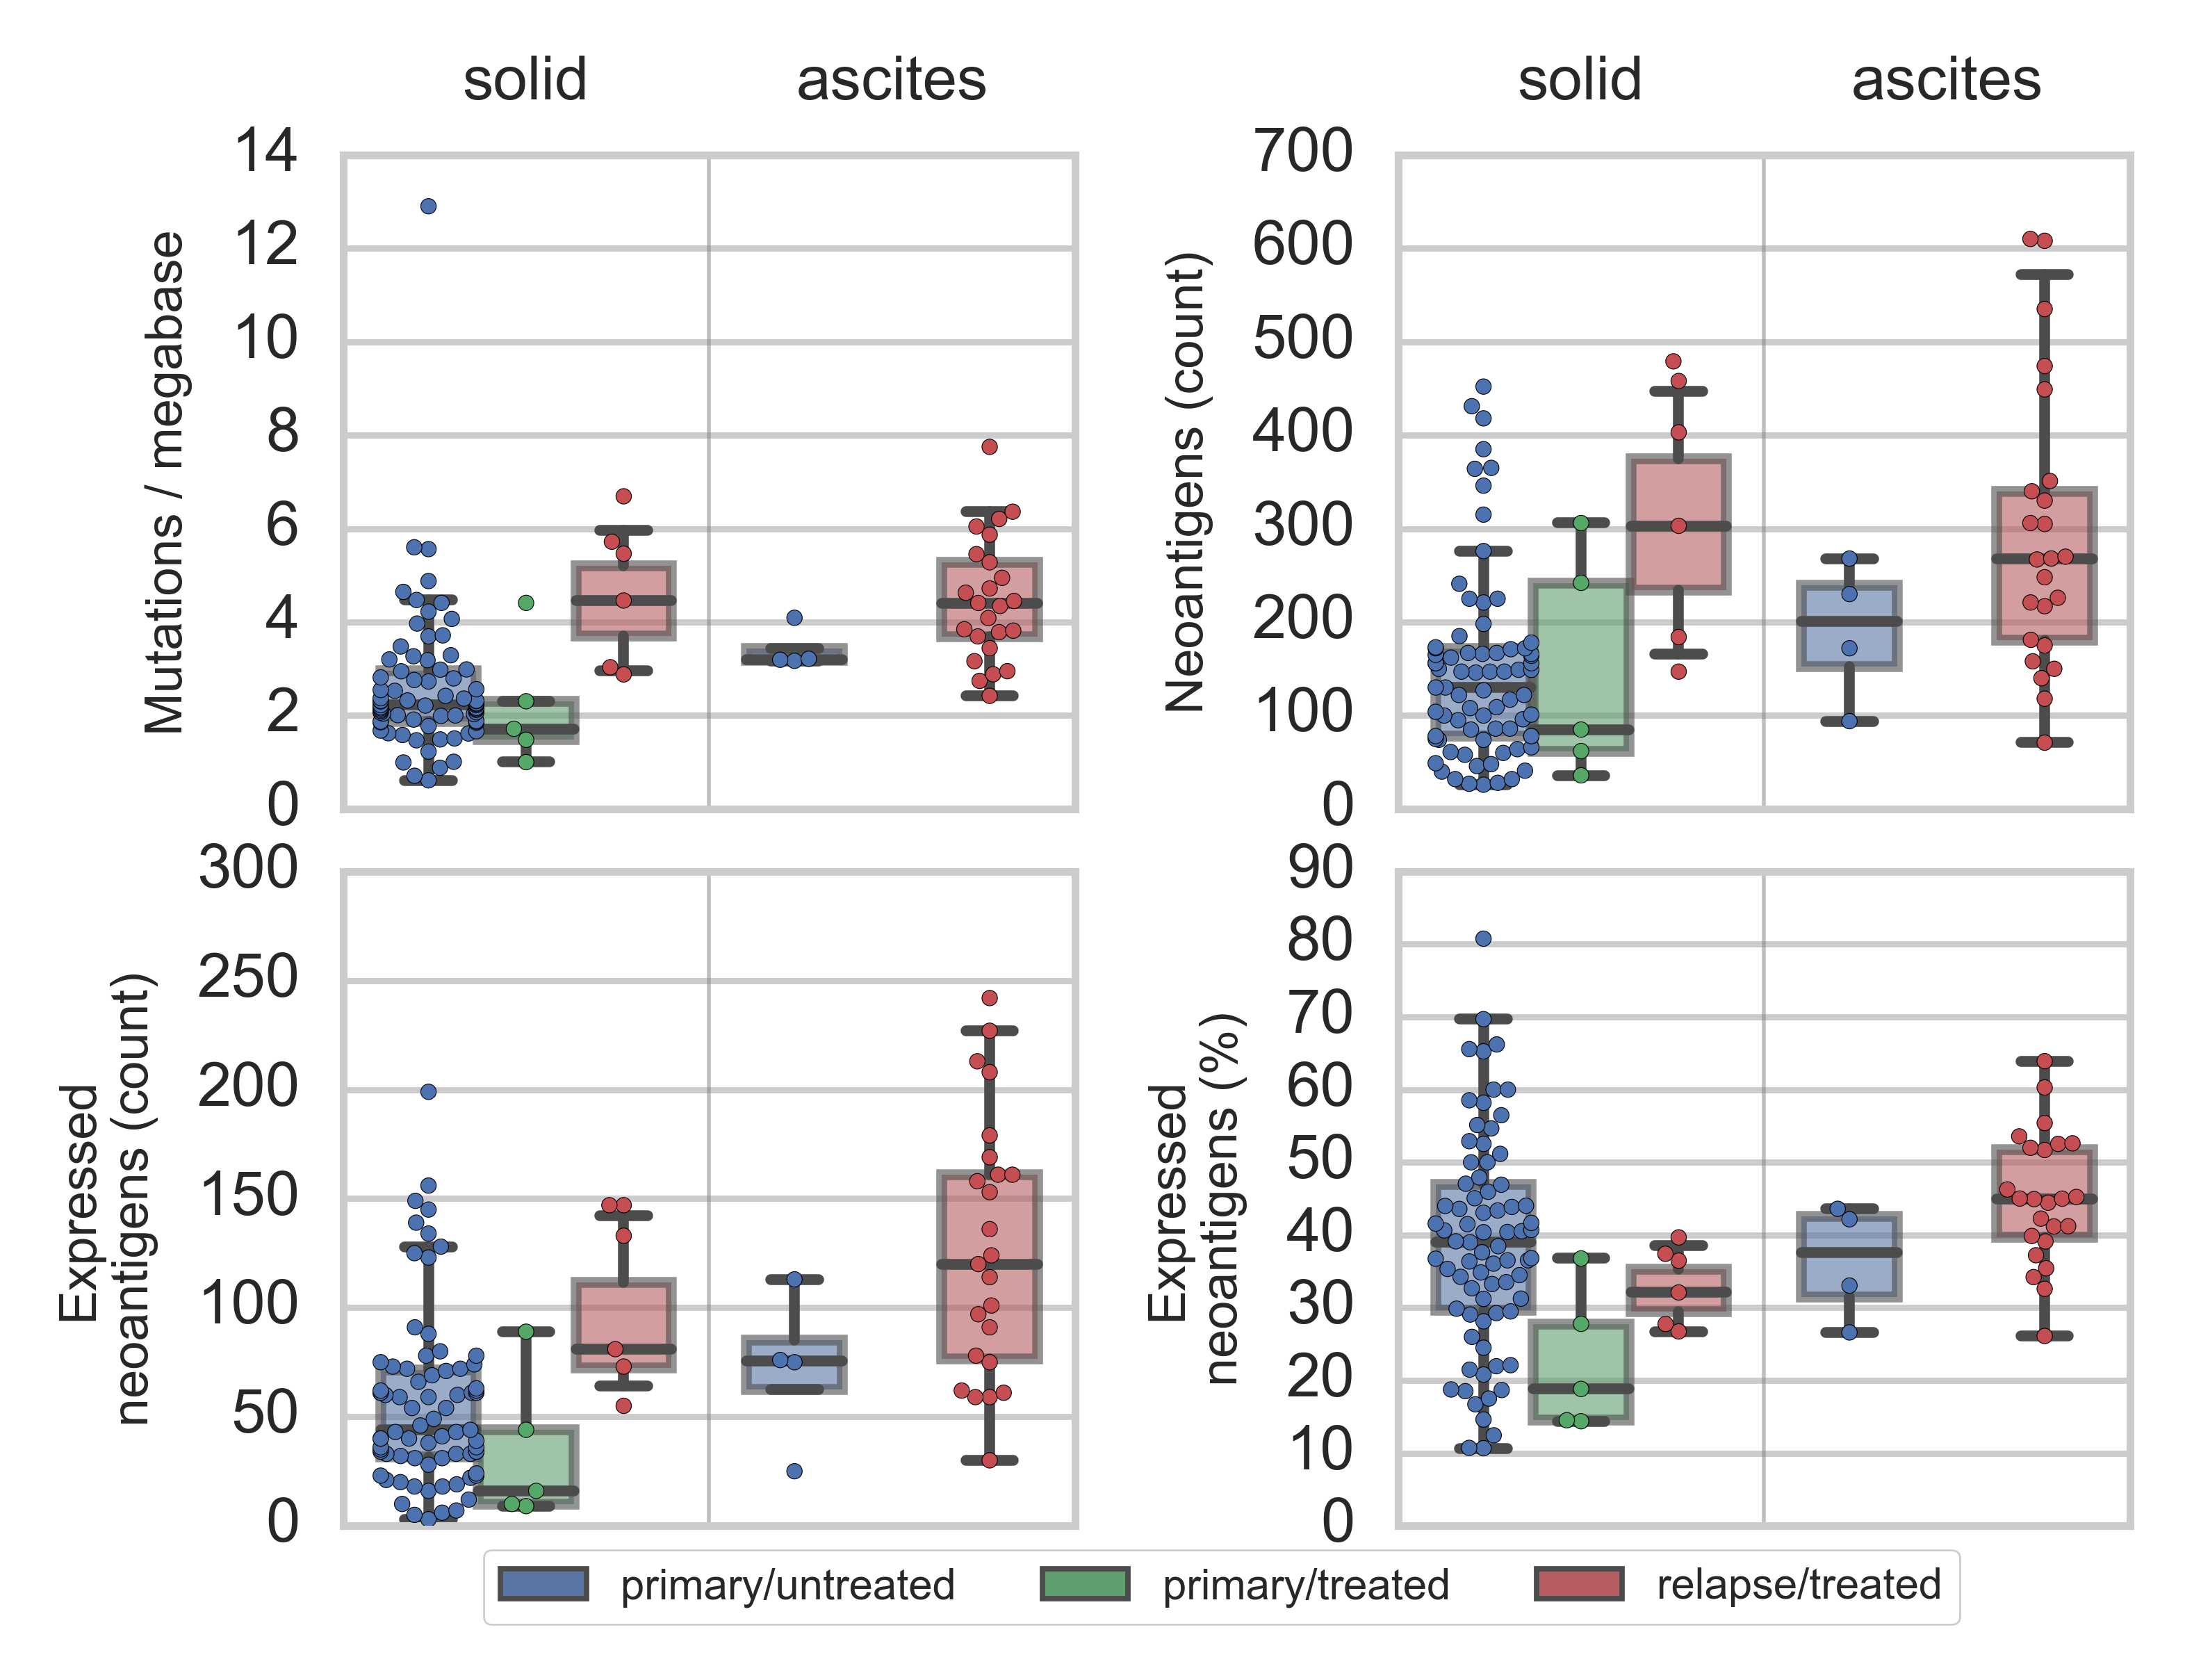

In [16]:
def format_figure():
    pyplot.xlabel("")
    pyplot.legend().remove()
    pyplot.ylim(ymin=0)
    pyplot.axvline(.5, color='gray', alpha=0.5, linewidth=0.5)
    pyplot.gca().xaxis.tick_top()

seaborn.set_context("paper")
seaborn.set_style("whitegrid")

ylabel_fontsize = "x-small"

pyplot.figure(figsize=(4,3))
grid=(2,2)
grid_points = [(row, col) for row in range(grid[0]) for col in range(grid[1])]
i = 0

def draw_boxplot(**kwargs):
    kwargs.update({
        'data': cohort_grouped_df,
        'whis': None,
        'x': 'tissue_type',
        'hue': "specific_treatment",
        'fliersize': 0,
        'hue_order': ("primary/untreated", "primary/treated", "relapse/treated"),
    })
    seaborn.boxplot(**kwargs)
    kwargs["data"] = cohort_df
    seaborn.swarmplot(
        data=kwargs['data'],
        x=kwargs['x'],
        y=kwargs['y'],
        hue=kwargs['hue'],
        hue_order=kwargs['hue_order'],
        size=2,
        split=True,
        linewidth=0.10,
        edgecolor='black',
        #palette=dict((x, 'black') for x in kwargs['hue_order'])
        #color=("0.0"),
       )
    pyplot.setp(pyplot.gca().artists, alpha=.6)
    for x in cohort_df.tissue_type.unique():
        for (description, df) in [("All samples", cohort_df), ("Grouped samples", cohort_grouped_df)]:
            print("**********", kwargs['y'], x, description)
            sub = df.ix[df.tissue_type == x]
            treatment_naive_values = (sub.ix[sub.specific_treatment == "primary/untreated"][kwargs['y']])
            adj_chemo_values = (sub.ix[sub.specific_treatment == "relapse/treated"][kwargs['y']])
            neoadj_chemo_values = (sub.ix[sub.specific_treatment == "primary/treated"][kwargs['y']])

            print("Medians: ", treatment_naive_values.median(), adj_chemo_values.median(), neoadj_chemo_values.median())
            print("Median error bars",
                  median_with_errorbars(treatment_naive_values, decimals=2),
                  median_with_errorbars(adj_chemo_values, decimals=2),
                  median_with_errorbars(neoadj_chemo_values, decimals=2))
            print("Percent change adjuvant", 
                  percent_change_with_errorbars(treatment_naive_values.values,
                                                adj_chemo_values.values))
            print("Percent change neoadjuvant", 
                  percent_change_with_errorbars(treatment_naive_values.values,
                                                neoadj_chemo_values.values))
            print("P-value adj change: ", scipy.stats.mannwhitneyu(treatment_naive_values.values, adj_chemo_values.values))
            print("P-value neoadj change: ", scipy.stats.mannwhitneyu(treatment_naive_values.values, neoadj_chemo_values.values))
            print("")
              
axes = []
    
ax = pyplot.subplot2grid(grid,grid_points[i])
axes.append(ax)
#pyplot.title("A", loc="left")
draw_boxplot(y="mutations_per_mb")
format_figure()
#pyplot.legend(loc="upper center")
#pyplot.title("Total mutations")
pyplot.ylabel("Mutations / megabase", fontsize=ylabel_fontsize)
i += 1

# Legend
#ax_legend = pyplot.subplot2grid(grid,(0,0), colspan=2)
(handles, labels) = ax.get_legend_handles_labels()
ax.legend(
    handles[:3],
    labels[:3],
    loc="upper center",
    fancybox=True,
    frameon=True,
    framealpha=1,
    fontsize="xx-small",
    ncol=3,
    bbox_to_anchor=(1.2, -1.1)
)

# STATEMENT TREATMENT P-VALUES
ax = pyplot.subplot2grid(grid,grid_points[i])
axes.append(ax)
#pyplot.title("A", loc="left")
draw_boxplot(y="peptides")
format_figure()
#pyplot.legend(loc="upper right")
#pyplot.title("")
pyplot.ylabel("Neoantigens (count)", fontsize=ylabel_fontsize)
i += 1

ax = pyplot.subplot2grid(grid,grid_points[i]) # , sharex=axes[0])
axes.append(ax)
#pyplot.title("Expressed mutations")
#pyplot.title("B", loc="left")
#sub_data = cohort_df[cohort_df.cohort != "TCGA"]
sub_data = cohort_df
draw_boxplot(y="expressed peptides")
format_figure()
#pyplot.title("Expressed neoantigens")
pyplot.ylabel("Expressed\nneoantigens (count)", fontsize=ylabel_fontsize)
pyplot.ylim(ymin=0, ymax=300)
ax.xaxis.set_major_formatter(pyplot.NullFormatter())
#ax.label_outer()
i += 1

ax = pyplot.subplot2grid(grid,grid_points[i]) #, sharex=axes[1])
axes.append(ax)
#pyplot.title("C", loc="left")
draw_boxplot(y="percent_peptides_expressed")
format_figure()
#pyplot.title("Fraction neoantigens expressed")
pyplot.ylabel("Expressed\nneoantigens (%)", fontsize=ylabel_fontsize)
ax.xaxis.set_major_formatter(pyplot.NullFormatter())
#ax.label_outer()
i += 1
pyplot.tight_layout(h_pad=0)

pyplot.savefig("../figures/counts.pdf")


In [21]:
cohort_grouped_df.groupby(["specific_treatment", "tissue_type"]).donor.nunique()

specific_treatment  tissue_type
primary/treated     solid           5
primary/untreated   ascites         4
                    solid          75
relapse/treated     ascites        21
                    solid           3
Name: donor, dtype: int64

In [20]:
# relapse/treated : 3 solid tissue donors
# primary/untreated: 4 ascites donors

(4 * 83 + 3 * 72) / 7

78.28571428571429